<a href="http://laf-fabric.readthedocs.org/en/latest/" target="_blank"><img align="left" src="images/laf-fabric-xsmall.png"/></a>
<a href="http://www.godgeleerdheid.vu.nl/etcbc" target="_blank"><img align="left" src="images/VU-ETCBC-xsmall.png"/></a>
<a href="http://www.persistent-identifier.nl/?identifier=urn%3Anbn%3Anl%3Aui%3A13-048i-71" target="_blank"><img align="left"src="images/etcbc4easy-small.png"/></a>
<a href="http://tla.mpi.nl" target="_blank"><img align="right" src="images/TLA-xsmall.png"/></a>
<a href="http://www.dans.knaw.nl" target="_blank"><img align="right"src="images/DANS-xsmall.png"/></a>

# Zipf's law

Show the word frequencies of Hebrew lexemes.

In [1]:
import sys, collections
%load_ext rpy2.ipython

from laf.fabric import LafFabric
import etcbc

fabric = LafFabric()

ImportError: dlopen(/Users/dirk/anaconda/lib/python3.4/site-packages/rpy2/rinterface/_rinterface.so, 2): Library not loaded: @rpath/R/lib/libR.dylib
  Referenced from: /Users/dirk/anaconda/lib/python3.4/site-packages/rpy2/rinterface/_rinterface.so
  Reason: image not found

In [22]:
source = 'etcbc'
version = '4b'

In [2]:
API = fabric.load(source+version, '--', 'zipf', {
    "xmlids": {"node": False, "edge": False},
    "features": ('''
        otype lex
        function typ
''',""),
    "primary": False,
})
exec(fabric.localnames.format(var='fabric'))

  0.00s LOADING API: please wait ... 
  0.00s INFO: USING DATA COMPILED AT: 2015-11-02T15-08-56
  2.47s LOGFILE=/Users/dirk/SURFdrive/laf-fabric-output/etcbc4b/zipf/__log__zipf.txt
  2.47s INFO: DATA LOADED FROM SOURCE etcbc4b AND ANNOX -- FOR TASK zipf AT 2016-01-07T14-24-42


In [3]:
freqs = collections.Counter()
for n in F.otype.s('word'):
    freqs[F.lex.v(n)] += 1

In [6]:
freqs_file = 'hfreqs.txt'
fr = open(freqs_file, 'w')
fr.write('lexeme\tfrequency\n')
for (lex, freq) in sorted(freqs.items(), key=lambda x: (-x[1], x[0])):
    fr.write('{}\t{}\n'.format(lex, freq))
fr.close()

In [7]:
%%R
library(ggplot2)

In [8]:
%R freqs = read.table('$freqs_file', header=TRUE)

,lexeme,frequency
0,W,51004
1,H,30386
2,L,20447
3,B,15768
4,>T,11016
5,MN,7681
6,JHWH/,6828
7,<L,5870
8,>L,5521
9,>CR,5500


In [9]:
%%R
str(freqs)
head(freqs)

'data.frame':	8777 obs. of  2 variables:
 $ lexeme   : Factor w/ 8777 levels "<B/","<B=/","<B==/",..: 7645 3333 4334 1542 1346 5030 3711 228 978 791 ...
 $ frequency: int  51004 30386 20447 15768 11016 7681 6828 5870 5521 5500 ...
  lexeme frequency
1      W     51004
2      H     30386
3      L     20447
4      B     15768
5     >T     11016
6     MN      7681


In [10]:
%%R
summary(freqs)

       lexeme       frequency      
 <B/      :   1   Min.   :    1.0  
 <B=/     :   1   1st Qu.:    1.0  
 <B==/    :   1   Median :    3.0  
 <BC[     :   1   Mean   :   48.6  
 <BD_>DWM/:   1   3rd Qu.:   11.0  
 <BD_MLK/ :   1   Max.   :51004.0  
 (Other)  :8771                    


In [11]:
%%R
quantile(freqs$frequency)

   0%   25%   50%   75%  100% 
    1     1     3    11 51004 


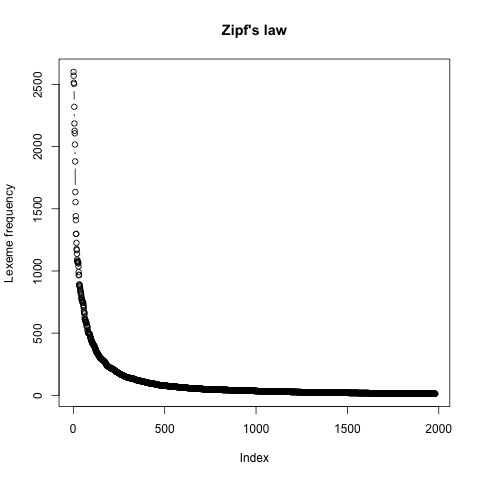

In [12]:
%%R
plot(
    sort(freqs$frequency[20:2000], decreasing=TRUE),
    type="b",
    main="Zipf's law",
    ylab = "Lexeme frequency",
)

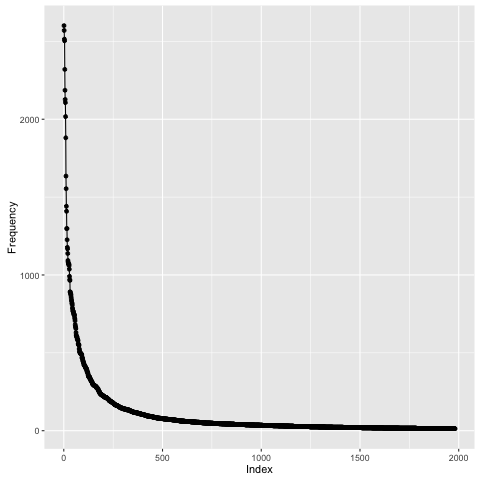

In [13]:
%%R

freqs.reduced = freqs[20:2000,]

ggplot(
    freqs.reduced,
    aes(
        x=1:nrow(freqs.reduced),
        y=sort(frequency, decreasing=TRUE)
    )
) + geom_line() + geom_point() + xlab("Index") + ylab("Frequency")

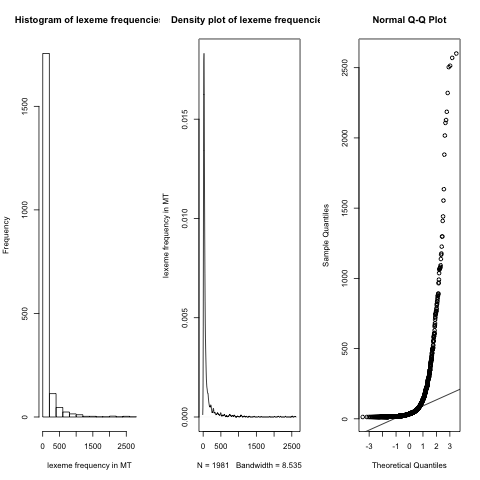

In [14]:
%%R
attach(freqs.reduced)

par(mfrow = c(1,3))
hist(frequency, main="Histogram of lexeme frequencies", xlab="lexeme frequency in MT", ylab="Frequency")
plot(density(frequency), main="Density plot of lexeme frequencies", ylab="lexeme frequency in MT")
qqnorm(frequency)
qqline(frequency)

detach(freqs.reduced)

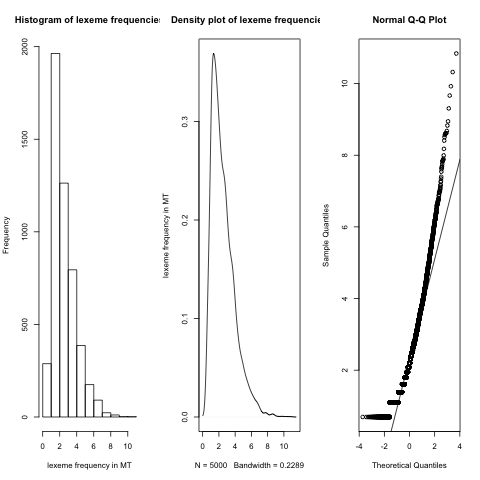

In [15]:
%%R
rm(freqs.reduced)
freqs.reduced = freqs[0:5000,]
attach(freqs.reduced)

par(mfrow = c(1,3))
hist(log(frequency), main="Histogram of lexeme frequencies", xlab="lexeme frequency in MT", ylab="Frequency")
plot(density(log(frequency)), main="Density plot of lexeme frequencies", ylab="lexeme frequency in MT")
qqnorm(log(frequency))
qqline(log(frequency))

detach(freqs.reduced)

In [16]:
%%R
shapiro.test(log(freqs.reduced$frequency))



	Shapiro-Wilk normality test

data:  log(freqs.reduced$frequency)
W = 0.90749, p-value < 2.2e-16



# Phrase functions

In [17]:
pfilename = 'pfunct.txt'
pfile = open(pfilename, 'w')
pfile.write('type\tfunction\n')
for p in F.otype.s('phrase'):
    pfile.write('{}\t{}\n'.format(F.typ.v(p), F.function.v(p)))
pfile.close()

In [19]:
%R phrases = read.table('$pfilename', header=TRUE)

,type,function.
0,PP,Time
1,VP,Pred
2,NP,Subj
3,PP,Objc
4,CP,Conj
5,NP,Subj
6,VP,Pred
7,NP,PreC
8,CP,Conj
9,NP,Subj


In [20]:
%%R
str(phrases)
head(phrases)

'data.frame':	253161 obs. of  2 variables:
 $ type     : Factor w/ 13 levels "AdjP","AdvP",..: 10 13 9 10 3 9 13 9 3 9 ...
 $ function.: Factor w/ 29 levels "Adju","Cmpl",..: 28 20 26 16 3 26 20 19 3 26 ...
  type function.
1   PP      Time
2   VP      Pred
3   NP      Subj
4   PP      Objc
5   CP      Conj
6   NP      Subj


In [23]:
etcbc_file = '{}/r/{}{}.txt'.format(API['data_dir'], source, version)

In [24]:
%R etcbc = read.table('$etcbc_file', sep="\t", header=TRUE, comment.char="")

,maxmonad,minmonad,monads,oid,otype,code,det,dist,dist_unit,domain,...,typ,uvf,vbe,vbs,vs,vt,book,chapter,label,verse
0,28758,1,1-28758,1,book,-2147483648,,-2147483648,,,...,,,,,,,Genesis,-2147483648,,-2147483648
1,673,1,1-673,2,chapter,-2147483648,,-2147483648,,,...,,,,,,,Genesis,1,,-2147483648
2,11,1,1-11,3,verse,-2147483648,,-2147483648,,,...,,,,,,,Genesis,1,"GEN 01,01",1
3,11,1,1-11,9,clause,-2147483648,,0,clause_atoms,?,...,xQtX,,,,,,,-2147483648,,-2147483648
4,11,1,1-11,8,clause_atom,0,,0,,,...,xQtX,,,,,,,-2147483648,,-2147483648
5,11,1,1-11,11,sentence,-2147483648,,-2147483648,,,...,,,,,,,,-2147483648,,-2147483648
6,11,1,1-11,10,sentence_atom,-2147483648,,-2147483648,,,...,,,,,,,,-2147483648,,-2147483648
7,4,1,1-4,4,half_verse,-2147483648,,-2147483648,,,...,,,,,,,,-2147483648,A,-2147483648
8,2,1,1-2,7,phrase,-2147483648,und,0,clause_atoms,,...,PP,,,,,,,-2147483648,,-2147483648
9,2,1,1-2,6,phrase_atom,-2147483648,und,0,clause_atoms,,...,PP,,,,,,,-2147483648,,-2147483648


In [26]:
%%R
attach(etcbc)

In [45]:
%%R
str(etcbc)

'data.frame':	1436858 obs. of  60 variables:
 $ maxmonad          : int  28758 673 11 11 11 11 11 4 2 2 ...
 $ minmonad          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ monads            : Factor w/ 691712 levels "1","1-11","1-2",..: 4 6 2 2 2 2 2 5 3 3 ...
 $ oid               : int  1 2 3 9 8 11 10 4 7 6 ...
 $ otype             : Factor w/ 12 levels "book","chapter",..: 1 2 11 3 4 8 9 5 6 7 ...
 $ code              : int  NA NA NA NA 0 NA NA NA NA NA ...
 $ det               : Factor w/ 3 levels "","det","und": 1 1 1 1 1 1 1 1 3 3 ...
 $ dist              : int  NA NA NA 0 0 NA NA NA 0 0 ...
 $ dist_unit         : Factor w/ 4 levels "","clause_atoms",..: 1 1 1 2 1 1 1 1 2 2 ...
 $ domain            : Factor w/ 5 levels "","?","D","N",..: 1 1 1 2 1 1 1 1 1 1 ...
 $ function.         : Factor w/ 30 levels "","Adju","Cmpl",..: 1 1 1 1 1 1 1 1 29 1 ...
 $ g_cons            : Factor w/ 24447 levels "","<B","<BCW",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ g_cons_utf8       : Factor w/ 24447 levels "","אאז

In [67]:
%%R
phrase_data = data.frame(function.[otype=='phrase'], typ[otype=='phrase'])

In [68]:
%%R
str(phrase_data)

'data.frame':	253161 obs. of  2 variables:
 $ function..otype.....phrase..: Factor w/ 30 levels "","Adju","Cmpl",..: 29 21 27 17 4 27 21 20 4 27 ...
 $ typ.otype.....phrase..      : Factor w/ 58 levels "","AdjP","AdvP",..: 19 25 18 19 5 18 25 18 5 18 ...


In [54]:
%%R


R InformationHelp files with alias or concept or title matching ‘nrows’ using fuzzy
matching:


base::browser           Environment Browser
  Aliases: browser
base::browserText       Functions to Retrieve Values Supplied by Calls
                        to the Browser
  Aliases: browserText, browserCondition, browserSetDebug
base::cbind             Combine R Objects by Rows or Columns
base::colSums           Form Row and Column Sums and Means
  Aliases: rowSums, .rowSums
base::environment variables
                        Environment Variables
  Aliases: R_BROWSER
base::nrow              The Number of Rows/Columns of an Array
  Aliases: nrow, NROW
base::rowsum            Give Column Sums of a Matrix or Data Frame,
                        Based on a Grouping Variable
  Aliases: rowsum, rowsum.default, rowsum.data.frame
base::xpdrows.data.frame
                        Data Frame Auxiliary Functions
  Aliases: xpdrows.data.frame
caTools::runmad         Median Absolute Deviation of Moving 